# Ireland Subway Locations:

 > Data: https://restaurants.subway.com/ireland

Goals of Web Scraping Project: 

 - Getting the City names where Subways is located in the city,
 - Getting the Links of those Subways location associated with the City

In [1]:
# Importing the Necessary Library:

import requests # to request the standard html
from bs4 import BeautifulSoup # tool for parsing the html

# For creating the data frame and standard library for organising data
import pandas as pd 

from IPython.display import Image # importing the image's in the notebook


In [2]:
URL = "https://restaurants.subway.com/ireland"
page = requests.get(URL)
page.encoding = 'ISO-885901'
soup = BeautifulSoup(page.text, 'html.parser')

In [3]:
print(soup.prettify()) # to print the source code of webpage for inspection

<!DOCTYPE doctype html>
<html lang="en">
 <head>
  <script async="" src="//assets.adobedtm.com/041a2403188d/46b5b45d8f01/launch-d251aacf6731.min.js">
  </script>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <link href="//www.yext-pixel.com" rel="dns-prefetch"/>
  <link href="//a.cdnmktg.com" rel="dns-prefetch"/>
  <link href="//a.mktgcdn.com" rel="dns-prefetch"/>
  <link href="//dynl.mktgcdn.com" rel="dns-prefetch"/>
  <link href="//dynm.mktgcdn.com" rel="dns-prefetch"/>
  <link href="//www.google-analytics.com" rel="dns-prefetch"/>
  <meta content="width=device-width, initial-scale=1, maximum-scale=5" name="viewport"/>
  <meta content="telephone=no" name="format-detection"/>
  <meta content="permanent-b0b701/assets/images/favicons/restaurants.subway.com/windows-tile-70x70.8d60b0e4.png" name="msapplication-square70x70logo"/>
  <meta content="permanent-b0b701/assets/images/favicons/restaurants.subway.co

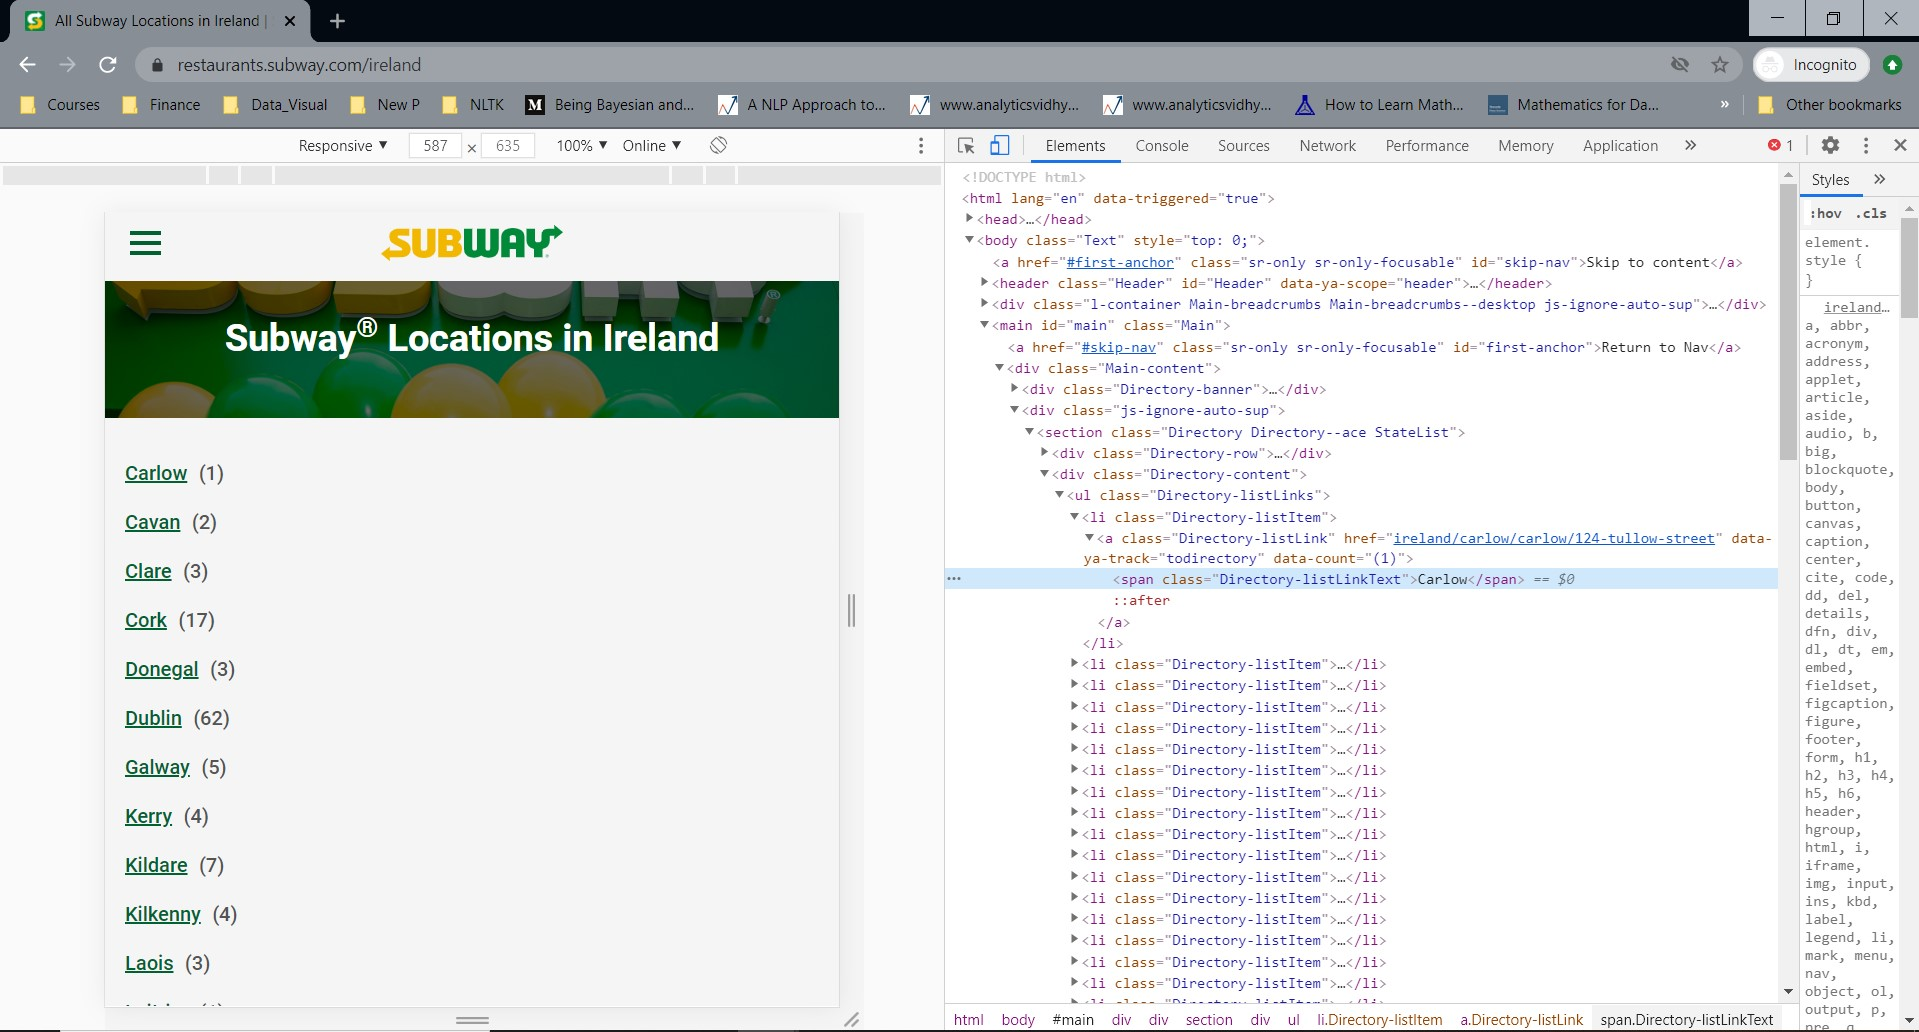

In [4]:
Image("WebsiteInspect.jpg")

 > Inspecting the target data on the webpage:

In [5]:
subway_store_city = soup.find_all(class_ = 'Directory-listItem')
for i in subway_store_city[:1]:
    print(i)

<li class="Directory-listItem"><a class="Directory-listLink" data-count="(1)" data-ya-track="todirectory" href="ireland/carlow/carlow/124-tullow-street"><span class="Directory-listLinkText">Carlow</span></a></li>


In [6]:
type(subway_store_city)

bs4.element.ResultSet

In [7]:
len(subway_store_city)

25

 > For Getting the URL links:

In [8]:
website_class = subway_store_city[1]
website_class_content =website_class.contents
print(website_class)

<li class="Directory-listItem"><a class="Directory-listLink" data-count="(2)" data-ya-track="todirectory" href="ireland/cavan"><span class="Directory-listLinkText">Cavan</span></a></li>


In [9]:
website_class_content=website_class.contents[0]
website_class_content.attrs

{'class': ['Directory-listLink'],
 'href': 'ireland/cavan',
 'data-ya-track': 'todirectory',
 'data-count': '(2)'}

In [10]:
store_href = website_class_content['href']

city_href = [] # Creating empty list

# filling the empty list:

for h in subway_store_city:
    cont = h.contents[0]
    href=cont['href']
    city_href.append(href)
    
for n in city_href[0:]:
    print(n)

ireland/carlow/carlow/124-tullow-street
ireland/cavan
ireland/clare
ireland/cork
ireland/donegal
ireland/dublin
ireland/galway
ireland/kerry
ireland/kildare
ireland/kilkenny
ireland/laois
ireland/leitrim/carrick-on-shannon/bridge-street
ireland/limerick
ireland/louth
ireland/mayo/swinford/carrabawn
ireland/meath
ireland/monaghan
ireland/offaly/tullamore/14-harbor-street
ireland/sligo/sligo/mail-coach-road
ireland/tipperary
ireland/waterford
ireland/westmeath
ireland/wexford
ireland/wicklow
ireland/additional-locations


 > For Getting the City Name:

In [11]:
city_list = soup.findAll(class_ = 'Directory-listLinkText')

for c in city_list[:1]:
    print(c)

<span class="Directory-listLinkText">Carlow</span>


In [12]:
len(city_list)

25

In [13]:
city = city_list[1]
city = city.contents[0]
print(city)

Cavan


In [14]:
city_name = [] # Creating empty list

# filling the empty list:

for n in city_list:
    cont = n.contents[0]
    name = cont
    city_name.append(name)
    
for n in city_name[0:]:
    print(n)

Carlow
Cavan
Clare
Cork
Donegal
Dublin
Galway
Kerry
Kildare
Kilkenny
Laois
Leitrim
Limerick
Louth
Mayo
Meath
Monaghan
Offaly
Sligo
Tipperary
Waterford
Westmeath
Wexford
Wicklow
Additional Locations


 > Creating the Data Frame:

In [15]:
data = pd.DataFrame(city_name, columns=['City'])
data['URL']=city_href

# Clearly we can observe in the Webpage source the 'href' links are not complete,

     
text ="https://restaurants.subway.com/" # missing value in the url's: 
# Creating the workable Url links:
data['URL'] = text+data['URL']

data

,City,URL
0,Carlow,https://restaurants.subway.com/ireland/carlow/...
1,Cavan,https://restaurants.subway.com/ireland/cavan
2,Clare,https://restaurants.subway.com/ireland/clare
3,Cork,https://restaurants.subway.com/ireland/cork
4,Donegal,https://restaurants.subway.com/ireland/donegal
5,Dublin,https://restaurants.subway.com/ireland/dublin
6,Galway,https://restaurants.subway.com/ireland/galway
7,Kerry,https://restaurants.subway.com/ireland/kerry
8,Kildare,https://restaurants.subway.com/ireland/kildare
9,Kilkenny,https://restaurants.subway.com/ireland/kilkenny
